# タイタニック

# 今回は自分の成長を確認する為、
# 前処理も<span style="color: red; ">DIVERに頼らず</span>自らの力で行いました。

## 前書き

あなたはデータサイエンスや機械学習に慣れていないか、Kaggle予測コンテストのシンプルなイントロを探しています。

競争の説明
RMS Titanicの沈没は、歴史上最も悪名高い難破船の1つです。 1912年4月15日に、タイタニック号は彼女の処女航海中に氷山に衝突して沈んで、2224人の乗客と乗組員のうち1502人が死亡した。この驚異的な悲劇は国際社会に衝撃を与え、船舶の安全規制を向上させました。

この難破船が生命の喪失につながった原因の1つは、乗客と乗組員に十分な救命艇がなかったことです。沈没を生き延びるには何らかの運があったにもかかわらず、女性、子供、上層階など、他の人よりも生き残る可能性が高いグループもあった。

この挑戦では、どのような人々が生き残る可能性が高いのかを分析してください。特に、機械学習のツールを適用して、どの乗客が悲劇から生き残ったかを予測するようにしてください。

練習スキル
バイナリ分類
PythonとRの基礎


### 事前知識
決定木とは、目的変数に属する確率を複数の説明変数の組み合わせで算出する方法です。  
イメージは、Yes/Noなどの条件に属するかどうかで確率を算出します。  
「段階的にデータを分割していき、木のような分析結果を出力する」ものです。   
決定木には２種類の分析があります。  
分類木：　式１のyが、性別のように、分類可能な変数で、分類を目的にして、決定木のアルゴリズムを使用する場合  
回帰木：　不動産の家賃の変動や、株価の変動等、分類ではなく、過去、及び、現在のデータから、未来の数値を予想する場合  
これらが、目的に応じて機械学習で使用されます。
決定木は、欠損値を欠損値として扱うこができる、特徴量のスケールの違いに影響を受けず、標準化のような前処理をしなくても良いというメリットがあり、現実的な問題に適しています。 一方、識別規則が単純なため分散が大きく、入力データの違いによる影響を受けやすいという問題があります。 そのような欠点を解消したアルゴリズムが、次に説明するランダムフォレストです。

ランダムフォレストとは、アンサンブル学習法(複数の分類器を集めて構成される分類器)の一つです。  
決定木を複数集めて使うので、木が集まってフォレスト（森）として使います。  
ランダムフォレストという名前が示唆する通り、決定木の集合体なので、条件分岐をもった幾つかの決定木をランダムに構築して、それらの結果を組み合わせて、「分類」または「回帰」をする方法で、アンサンブル学習と呼ばれます。　　

またランダムフォレストや決定木の長所として、処理結果が解釈しやすく妥当性を判断しやすい点が決定木分析の一番の強みです.  
決定木分析を単独で実行する際は、そのモデルを利用してどうこうするというよりも、「データが分割されていく流れをなんとなく把握する」ことが目的となることが多いようです。　　  
また、その他の機械学習モデルと比較すると処理内容についても比較的簡単に理解できます。　　  
他にも、数値、カテゴリデータが混在していても大丈夫と言う点です。    
説明変数には数値データ、カテゴリデータ等の様々なデータ型が利用可能です。     
例えば、顧客の性別等のカテゴリデータや、購入金額等の数値データの両方をモデル作成時の説明変数として利用可能です。    
さらに必要な前処理が少なくすみます。  
決定木分析では、「データを分割する指標」として特徴量を使うので、データの前処理（スケーリング等）に伴う負担がかなり軽減されます。
ランダムフォレストの短所として、ランダムに使用する特徴量の数ですが、問題によっては最適な数というのは変わるので、パラメータとしてチューニングする必要はあります。  
また説明変数が多くなるので、なぜその特徴が大切なのか？などの疑問に対し、SVMやロジスティック回帰と違い説明がつきにくです。  
他にも、ランダムフォレストはランダムにデータを抽出するのでシードを決めておかないと再現性の無いモデルが出来上がってしまうことなども挙げられます。

説明変数(特徴)が多くなりやすい場合や全体的に相関の低いデータの場合、ランダムフォレストを使うことで沢山の特徴で学習することが可能な為適しています。

今回のカーネルは以下の流れで進んでいきます。  

・データ取得  
・データ可視化  
・前処理  
・モデル選択  
・データセット分割  
・学習  
・評価  


# 1.事前準備

## ライブラリのインポート
まずは必要なライブラリをインポートしましょう。

In [152]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

### データ読み込み
今回使うデータはこちらからダウンロードしてください。  
https://www.kaggle.com/c/titanic

今回のデータは生存したかどうかを予測するモデルを作ることが目的です。  
Survival = 0 = No, 1 = Yes

In [153]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

まずはデータがどのようになっているか見ていきましょう。

In [154]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [155]:
train.shape

(891, 12)

計12個の特徴量と８９１のデータ量からなっていることがわかりました。  
まずは学習するにあたって、どのモデルでも学習ができるよう欠損が無いかを確認していきましょう。

In [156]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

客室と年齢に欠損があることが確認できました。  
そして客室のデータには687個もの欠損があります。  
これは全データの７割近くが欠損してることを意味しています。  
データとしての期待が持てないので、客室情報は外して年齢のデータを見ていきましょう。

### データの可視化

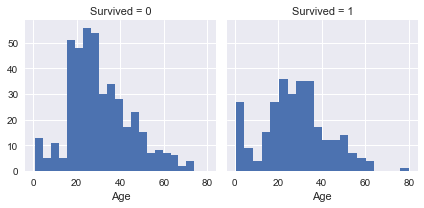

In [157]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

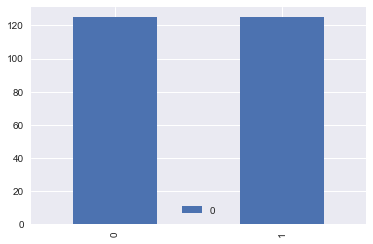

In [158]:
nan_surve0 = train[(train["Survived"]) == 0].Age.isnull().sum()
nan_surve1 = train[(train["Survived"]) == 1].Age.isnull().sum()

pd.DataFrame([nan_surve0,nan_surve1]).plot.bar()

ここからわかるデータとして  
・幼児は高い生存率を示した。  
・一番の高齢者（年齢= 80）が生き残った。  
・15-25歳の多数が生き残れなかった。  
・ほとんどの乗客は15-35歳の範囲にあります。  
また年齢の欠損がある人は生存率が半々であることがわかりました。  

In [159]:
train.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

今回は欠損に偏りがない(ランダム)だと仮定し欠損は取り外して進めていきたいと思います。  

# データの前処理
前処理とはデータを綺麗に整理することです。
なぜ前処理を行う必要があるのかといいますと、データによっては欠損値や異常値が存在したり、数値では無いカテゴリーデータが存在することが多くあります。  
今回使うランダムフォレストではそこまでの前処理は必要ないですが、モデルによってはそもそも欠損を無くしたりカテゴリーデータを数値データに直さないと学習出来ないモデルもあります。  
またモデルの種類も様々で、ロジスティック回帰などは外れ値が存在する場合外れ値に引っ張られてしまい精度が著しく落ちてしまうこともあります。  
その為、前処理をしっかり行うことで精度も上がり汎用性の高いモデルを作ることが可能になります。  

前処理を行う際はデータ型、欠損の有無、外れ値の有無をまず確認することが大切です。

In [160]:
train = train.drop("Cabin",axis = 1)

In [161]:
test = test.drop("Cabin",axis = 1)

In [162]:
train = train.dropna()

これで欠損の処理ができました。  
もう1度データを確認してみましょう。

In [163]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


正直、名前とチケット番号に生存との繋がりがあるとは思えません。  
今回はその特徴も省きましょう。

In [164]:
train = train.drop(["Name","Ticket"],axis = 1)
test = test.drop(["Name","Ticket"],axis = 1)

これで不必要なデータが無くなりました。  
次にカテゴリデータがみてとれるので、型を確認してみましょう。

In [165]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [166]:
set(train.Sex)

{'female', 'male'}

In [167]:
set(train.Embarked)

{'C', 'Q', 'S'}

性別は２種類に別れており、行き先は3つあったそうです。  
性別はラベルエンコーダーにかけ行き先はOneHotEncoderで変えましょう。

In [168]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def les(data):
    
    for col in data:
        if data[col].dtype == "object":
            if len(list(data[col].unique())) <= 2:
                le.fit(data[col])
            
                data[col] = le.transform(data[col])
                
    data = pd.get_dummies(data)
    return data

In [169]:
train = les(train)
test = les(test)

In [170]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1


これで全てのデータを数値データに変えることができました。  
どのデータが重要か調べるためにまずは相関をみてみましょう。

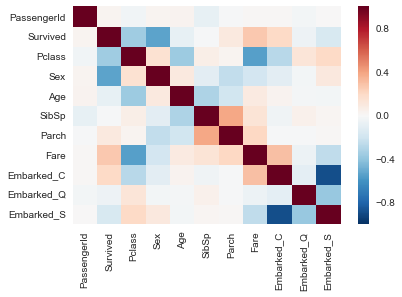

In [171]:
sns.heatmap(train.corr())

In [172]:
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,0.029526,-0.035609,0.024674,0.033681,-0.082704,-0.011672,0.009655,0.008654,-0.027045,0.004605
Survived,0.029526,1.000000,-0.356462,-0.536762,-0.082446,-0.015523,0.095265,0.266100,0.195673,-0.048966,-0.159015
Pclass,-0.035609,-0.356462,1.000000,0.150826,-0.365902,0.065187,0.023666,-0.552893,-0.279194,0.131989,0.197831
Sex,0.024674,-0.536762,0.150826,1.000000,0.099037,-0.106296,-0.249543,-0.182457,-0.103611,-0.027256,0.109078
Age,0.033681,-0.082446,-0.365902,0.099037,1.000000,-0.307351,-0.187896,0.093143,0.038268,-0.021693,-0.025431
SibSp,-0.082704,-0.015523,0.065187,-0.106296,-0.307351,1.000000,0.383338,0.139860,-0.046227,0.051331,0.018968
Parch,-0.011672,0.095265,0.023666,-0.249543,-0.187896,0.383338,1.000000,0.206624,-0.009523,-0.009417,0.013259
Fare,0.009655,0.266100,-0.552893,-0.182457,0.093143,0.139860,0.206624,1.000000,0.301337,-0.062346,-0.250994
Embarked_C,0.008654,0.195673,-0.279194,-0.103611,0.038268,-0.046227,-0.009523,0.301337,1.000000,-0.095623,-0.884986
Embarked_Q,-0.027045,-0.048966,0.131989,-0.027256,-0.021693,0.051331,-0.009417,-0.062346,-0.095623,1.000000,-0.378859


見ると性別とPclassに相関が少し見られました。  
Pclassとはなんなのでしょう？  
調べて見るとチケットクラスだそうです。  
pclass: A proxy for socio-economic status (SES)  
1st = Upper　　  
2nd = Middle　　  
3rd = Lower　　  

データ全体が見やすいように可視化してみましょう

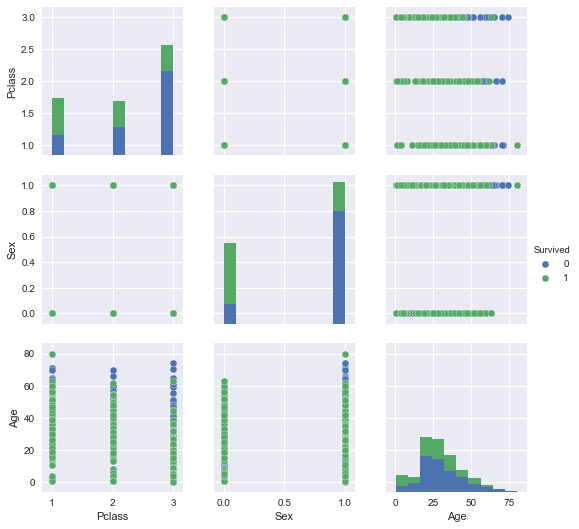

In [173]:
sns.pairplot(train, hue='Survived',vars=["Pclass","Sex","Age"])

特に相関のあった３種類の特徴は確かにみて取れるくらいデータに差が出てることがわかりました。  

### 不均衡データ問題
今回のカーネルでは分類を扱います。    
今あるデータが１：１のデータになっていない場合もあります。    
実世界の問題は，99%と1%といったように，クラスのデータ数に大きく差が開いている場合がよくあります。  
例えば重病患者とそうでない人を分類したいなどの場合は，クラスのデータ数にかなりの偏りが生じ，予測精度が大きく低下してしまいます。  

実際にターゲットがどの様になっているか確認していきましょう。

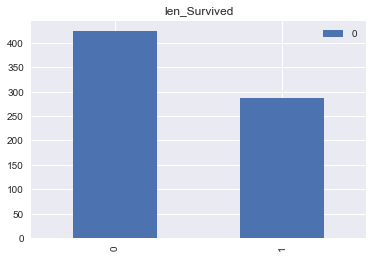

In [174]:
pd.DataFrame([sum(train["Survived"] == 0),sum(train["Survived"] == 1)]).plot.bar()
plt.title("len_Survived")

データに生存者の差が少しあることがわかりました。  
この不均衡データは注意して学習させる必要があります。  

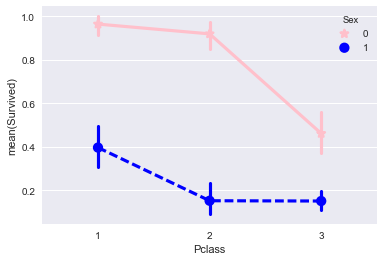

In [175]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=train,
              palette={1: "blue", 0: "pink"},
              markers=["*", "o"], linestyles=["-", "--"])

こちらのプロットではPclass(客室クラス)と性別で大きく生存確率が違うことがわかりました。  
これはPclassが１で女性の場合ほぼ生存できたことを意味しています。

最後に異常値などが無いかを確認しましょう。

In [176]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,0.636236,29.642093,0.514045,0.432584,34.567251,0.182584,0.039326,0.778090
std,258.683191,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.386597,0.194506,0.415823
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,0.000000,0.000000,1.000000
50%,445.000000,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.645850,0.000000,0.000000,1.000000
75%,677.250000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000


特に問題は無さそうなのでこのまま進めていきましょう

これで一通りの前処理は終わりました。  
モデルによってはここから特徴を選択することが大切になる場合があります。  
今回はランダムフォレストなので特徴はこのままで進めていきたいと思います。

# 3.学習
それでは学習を始める準備をしましょう。  
まずはデータセットを分割します。

今回はランダムフォレストを使用しますが、分類問題を解決するために用いられる手法として他にもロジスティック回帰、SVM、LightGBMなどがあります。  

ロジスティック回帰は昔から用いられている分類問題を線で引き分ける手法です。  
この問題を一般化線形モデルともいいます。  
ロジスティック式は、1838年にベルハルストが考案しました。  
彼は、人口増加を説明するモデルとして、この式を考案した（彼が兵站学(ロジスティクス))教官であったためロジスティックと命名したといわれる）。  
＊兵站学 = 戦闘地帯から後方の、軍の諸活動・機関・諸施設を総称したもの  
ロジティック回帰はアルゴリズムがシンプルであるため、分かりやすい分類問題などですぐに実装できることや、目的変数の説明が容易であるとこ、結果の要因を追求することが可能であることなどがメリットです。  
デメリットとして、ロジスティック回帰では上手く分類できない問題なども沢山あります。  
また他の難しいアルゴリズムと比べてしまうとどうしても信用性に欠けるなどの欠点もあり、簡単なアルゴリズムであるために前処理にとても時間をかけなくてはいけません。  

SVMはサポートベクターと呼ばれる分類が可能になる直線から一番近いデータを参照し、その幅を許容域と考える手法です。    
またカーネル関数を取り入れた一連の手法では、どのような写像が行われるか知らずに計算できることから、カーネルトリック (Kernel Trick) と呼ばれている。  
SVMは1963年にウラジミール・ヴァプニクが考案しました。  
彼は、手書き認識を含む機械学習コミュニティに関心のある多くの問題についてその性能を実証しました。  
SVMのメリットとして、外れ値の影響を受けずらく非常に高い精度で分類問題を解くことが可能です。
またSVMは非線形の問題も解決することが可能な優れたモデルです。  
デメリットとして、SVMは決定木などと比べると前処理をしっかり行う必要があり、相関が低いデータだと中々精度が出しずらい点にあります。  
また結果の要因を追求することが難しいことなどが挙げられます。

LightGBMはMicrosoftが関わるGradient Boostingライブラリの一つで、決定木を元に作られた勾配ブースティング木のモデルです。 　　 
売り文句はかい摘んで言うと「速くで正確！」とのことです。  
長所として、前処理がほぼ不必要で精度の高いモデルを作ることが可能なことです。  
また機械学習がわからない人でもとりあえずデータを放り込めばそれなりに精度が高いモデルを作ることができます。  
デメリットは、結果の要因を追求することがほぼ不可能なことと、便利だからとLightGBMばかり使っていると何も知識が増えないことです。

「どのような機械学習アルゴリズムを使用すべきか」という質問への答えは、 常に「場合による」です。   
データのサイズ、品質、および性質によって異なります。得られた回答で何を行うかによって異なります。 アルゴリズムの数値演算が使用しているコンピューターの命令にどのように変換されるかによって異なります。 そして、どれだけ時間があるかによって異なります。 最も経験豊富なデータ科学者であっても、試してみる前にどのアルゴリズムが最適か判断することはできません。

## データセット分割

In [177]:
target = train.Survived
train = train.drop("Survived",axis = 1)

In [178]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, target, random_state=0,test_size=0.2)

これでデータの分割ができました。  
今回はランダムフォレストを使っていきます。  
まずは何もパラメータを設定せず、どのくらい制度が出るかみてみましょう。

In [179]:
from sklearn.ensemble import RandomForestClassifier

In [180]:
rf = RandomForestClassifier(max_depth=15,criterion='entropy', random_state=0)

In [181]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [182]:
pred = rf.predict(x_test)

スコアを出す方法もスクラッチしてみます。  
今回はkaggleにしたがって正答率を使います。

In [183]:
def accuracy(pred, y):
        accuracy = np.sum(pred == y) / len(y)
        return accuracy

In [184]:
accuracy(pred,y_test)

0.7692307692307693

今回の目標８０点に届きませんでした。  
適切なパラメーターを交差検証とグリッドサーチを使い探してみましょう。

In [185]:
from sklearn.grid_search import GridSearchCV

In [186]:
rf2 = RandomForestClassifier(random_state=0)

In [187]:
# 動かすパラメータを明示的に表示、今回は決定木の数を変えてみる
params = {
'n_estimators': [4, 6, 9],
'max_features': ['log2', 'sqrt','auto'],
'criterion': ['entropy', 'gini'],
'max_depth': [2, 3, 5, 10],
'min_samples_split': [2, 3, 5],
'min_samples_leaf': [1,5,8]}

In [188]:
import warnings
warnings.filterwarnings('ignore')
#sklernの警告がうざいため

# 4.評価

In [189]:
# ハイパーパラメータ探索
cv = GridSearchCV(rf2, params, cv = 5, scoring= 'accuracy', n_jobs =1)
cv.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt', 'auto'], 'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, 5, 10], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [190]:
cv.grid_scores_

[mean: 0.69244, std: 0.01508, params: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 4},
 mean: 0.72759, std: 0.02110, params: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 6},
 mean: 0.75747, std: 0.02668, params: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 9},
 mean: 0.69244, std: 0.01508, params: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 4},
 mean: 0.72759, std: 0.02110, params: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 6},
 mean: 0.75747, std: 0.02668, params: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 

In [191]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 9}

ベストのパラメーターを見つけることができたので、もう一度学習してみましょう

In [232]:
rf = RandomForestClassifier(criterion = 'gini', max_depth=5,
 max_features= 'log2',min_samples_leaf= 1,min_samples_split= 2,
 n_estimators= 9)

In [233]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [234]:
pred = rf.predict(x_test)

In [235]:
accuracy(pred,y_test)

0.8321678321678322

目標の80点を越えることができました。  
交差検証をして確認してみましょう。

In [288]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, x_train, y_train,scoring="accuracy")
# 各分割におけるスコア
print('Cross-Validation scores: {}'.format(scores))
import numpy as np
print('Average score: {}'.format(np.mean(scores)))

Cross-Validation scores: [0.84210526 0.81052632 0.7989418 ]
Average score: 0.8171911259630558


実際にモデルのハイパーパラメータが正しいかどうかや過学習をおこしてないかを検証する必要があります。  
検証をしないでAccuracyだけを信じてしまうと別のデータになった場合、汎用性が無く精度が落ちてしまう場合もあるからです。
検証方法は色々あり、ホールドアウト法や交差検証などがあります。  
今回は交差確認方を使いクロスバリデーションを行います。

交差検証とは、統計学において標本データを分割し、その一部をまず解析して、残る部分でその解析のテストを行い、解析自身の妥当性の検証・確認に当てる手法です。  
交差確認法ではまずデータをランダムなｋ個の集合に分割します。そしてそのうちのｋ－１個を訓練データとしてパラメータを学習し、のこりの1個の集合で性能を評価します。
こうした組み合わせはｋ通りあるので、最終的な性能評価はｋ個の平均を取って決定します。
十分な数のデータがあるときはｋ＝１０や５が選ばれることが多いです。逆にデータ数が非常に少ないときはｋ＝Ｎ（全データ）として行います。ｋ＝Ｎの場合はleave one out（LOO）と呼ばれることも多いです。

最後に決定木がどのような特徴を重視したかみてみましょう。

In [196]:
fi = pd.DataFrame({'feature': list(x_train.columns), 'importance': rf.feature_importances_})

In [197]:
fi = fi.sort_values(by = "importance")[::-1]

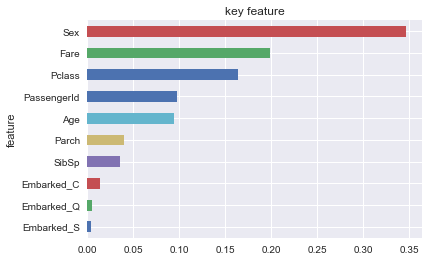

In [198]:
name = fi["feature"]
value = fi["importance"]
value.index = name

value[:20][::-1].plot.barh()
plt.title("key feature")
plt.show()

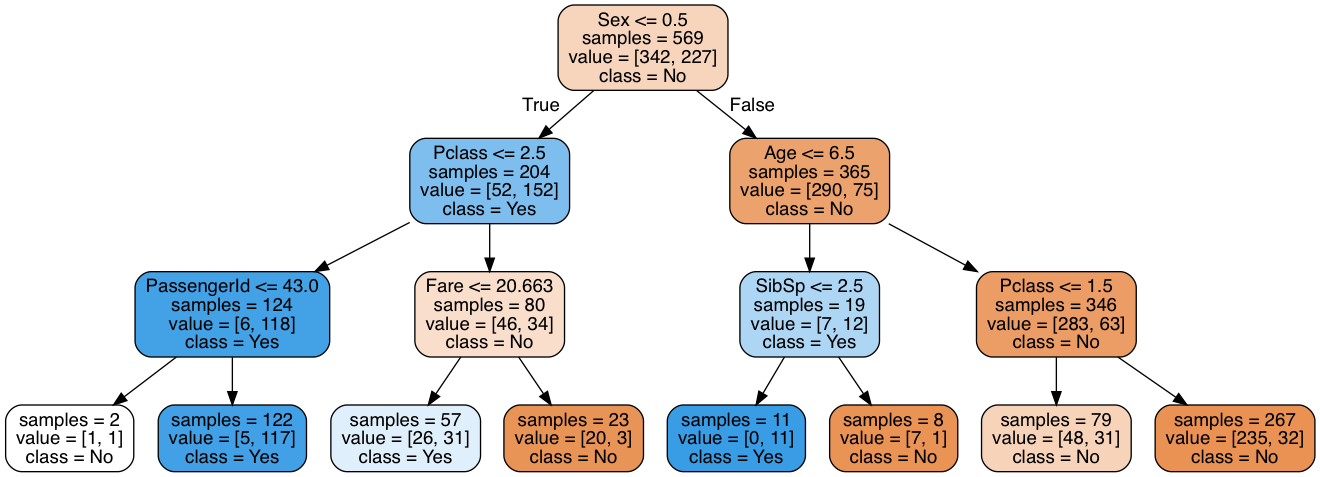

In [199]:
#sklearn.treeは決定木分析ができる
from sklearn import tree

#Pythonの表示ツール用の公開API
from IPython.display import Image as PImage

#サブプロセス管理
from subprocess import check_call

#Pillowは画像処理ライブラリ
from PIL import Image, ImageDraw, ImageFont

#正規表現ライブラリ
import re

#ツリーの深度
decision_tree = tree.DecisionTreeClassifier(max_depth = 3)

#train.targetを学習
decision_tree.fit(x_train, y_train)

# 訓練されたモデルを.dotファイルとしてエクスポートする
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = False,#各ノードに不純物を表示します。
                              feature_names = x_train.columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,#ツリーをトップダウンでなく左から右に向けます。
                              filled= True )#分類のための多数決クラス、回帰の値の末尾数、
        #または複数出力のノードの純度を示すノードをペイントします。
        
#.dotを.pngに変換してWebノートブックに表示できるようにする
#check_callでコマンドでファイル検索
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# PILによるチャートの注釈
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png",)

今回のカーネルを通してランダムフォレストを深く知ることができました。